#Using Penguine data classification using perceptoron

In [ ]:
# Load Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Load PyTorch libary
import torch as pt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Upload and view data

In [ ]:
# Upload data from the web
url = 'https://bit.ly/palmerpenguinscsv'
penguins_df = pd.read_csv('https://bit.ly/palmerpenguinscsv')

**Check and see if the dataframe loaded correctly**

In [ ]:
penguins_df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins_df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


**Examine the data types**

In [ ]:
# Examine data types
penguins_df.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Examine the shape**

In [ ]:
penguins_df.shape

(344, 9)

#Clean and transform data

In [ ]:
# Drop the missing values
penguins_df.dropna(inplace=True)

In [ ]:
# species type into a category
penguins_df['species'] = penguins_df['species'].astype('category')
# species type into a category
penguins_df['island'] = penguins_df['island'].astype('category')
# sex type into a category
penguins_df['sex'] = penguins_df['sex'].astype('category')

In [ ]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rowid              333 non-null    int64   
 1   species            333 non-null    category
 2   island             333 non-null    category
 3   bill_length_mm     333 non-null    float64 
 4   bill_depth_mm      333 non-null    float64 
 5   flipper_length_mm  333 non-null    float64 
 6   body_mass_g        333 non-null    float64 
 7   sex                333 non-null    category
 8   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(2)
memory usage: 19.6 KB


#Looking for the target
Our target variable is going to be the species, and our input variables are going to be the numerical values.

In [ ]:
9# filter numaric columns
float_cols = [col for col in penguins_df.columns if penguins_df[col].dtype == 'float64']
# create new dataframe with numaric columns and target variable
penguins_numeric_df = penguins_df[float_cols + ['species']]

In [ ]:
#check new dataframe
penguins_numeric_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


#Exploratory Visual and Descriptive Analysis

In [ ]:
#check corretlation
penguins_numeric_df.corr()

<ipython-input-12-55c65c40557f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_numeric_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


1.   There is a strong positive correlation between flipper_length_mm and body_mass_g
2.  There are very weeek correlation between bill_depth_mm and bill_depth_mm

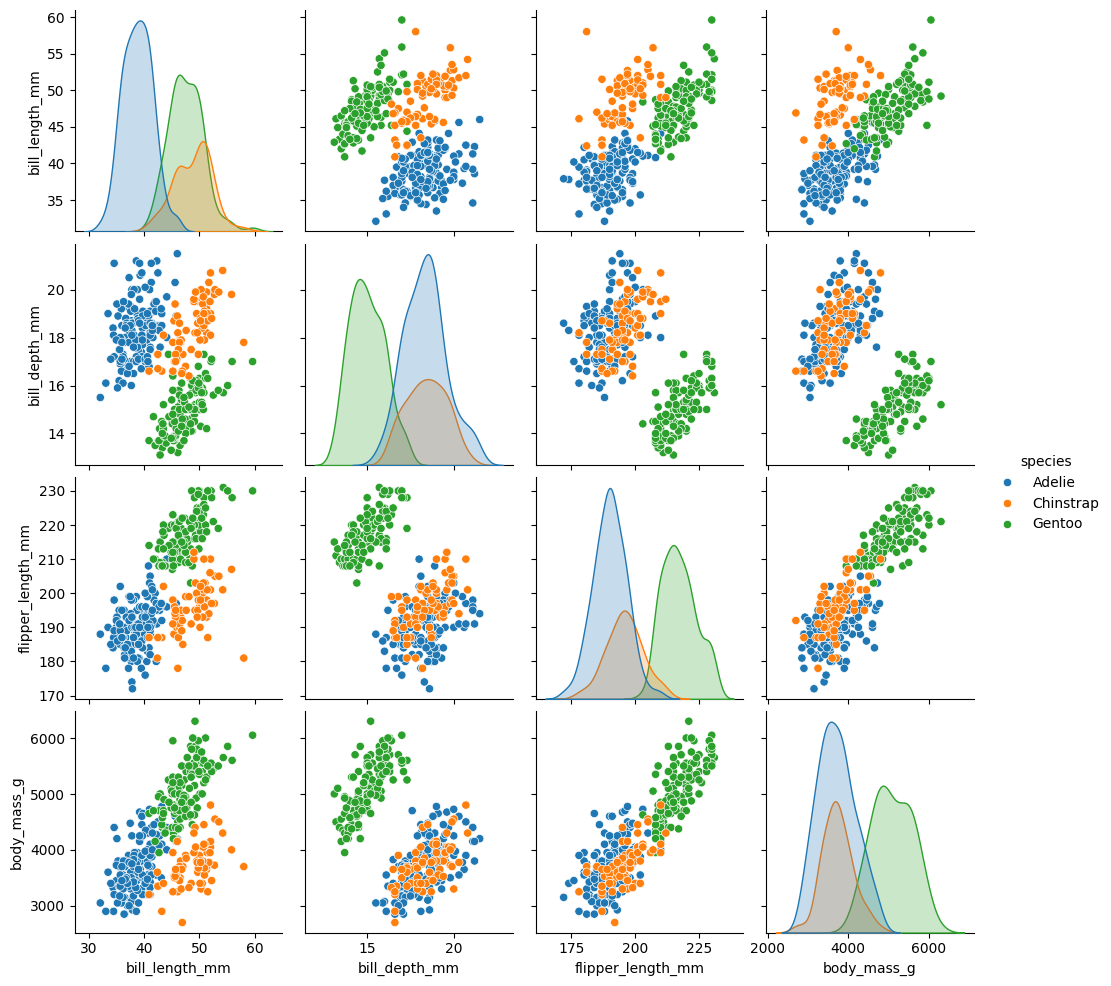

In [ ]:
# Build a scatterplot matrix of all the numeric variables in the dataset.
fig = sns.pairplot(data=penguins_numeric_df,hue='species')

Adele and Chinstrap will be difficult to separate, so we will exclude Chinstrap from our data collection.

In [ ]:
# new dataframe without chinstrap

chinless_df = penguins_numeric_df[penguins_numeric_df['species']!='Chinstrap']

# Check new df species

chinless_df['species'].unique()

['Adelie', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [ ]:
# new dataframe
simple_penguins_df = chinless_df[['body_mass_g','bill_depth_mm', 'species']]
#rawX is created as a PyTorch tensor containing the values of the 'body_mass_g' and 'bill_depth_mm' columns
rawX = pt.Tensor(simple_penguins_df[['body_mass_g','bill_depth_mm']].values)
# rawy, which represents the target variable, which set to 1.0 where the species is 'Gentoo' and 0.0 otherwise.
rawy = pt.Tensor((simple_penguins_df['species']=='Gentoo').values*1.0)
#input features (rawX) and the target variable (rawy)
num_rows = len(rawy)
num_rows, rawy[0:10]

(265, tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# Shuffle the data
shuffled_inds =  pt.randperm(num_rows)

# Define the percentage of data for validation
pct_valid = 0.2

# Calculate the number of examples for training and validation
num_train = int(np.floor((1 - pct_valid) * num_rows))
print(f'{num_train} training examples and {num_rows - num_train} validation examples')

# Extract training data
train_rawX = rawX[shuffled_inds[:num_train], :]
train_rawy = rawy[shuffled_inds[:num_train]]

# Extract validation data
valid_rawX = rawX[shuffled_inds[num_train:], :]
valid_rawy = rawy[shuffled_inds[num_train:]]

212 training examples and 53 validation examples


#Standardization  using the mean and standard deviation computed from the training data

In [ ]:
# Compute the mean and standard deviation of the training data along each feature
train_mean = train_rawX.mean(axis=0)
train_std = train_rawX.std(axis=0)

# Standardize the training data
train_X = (train_rawX - train_mean) / train_std

# Standardize the validation data using the mean and standard deviation of the training data
valid_X = (valid_rawX - train_mean) / train_std

#Recoding the target vairable (again)
binary classification tasks when working with a perceptron algorithms that require target valuesadjusting the target variable train_y and valid_y to be +1 or -1.

In [ ]:
# Adjust the target variable to be +1 or -1
train_y = train_rawy * 2 - 1
valid_y = valid_rawy * 2 - 1

# Check the minimum, maximum, and unique values of the adjusted target variable
print("Minimum value of train_y:", train_y.min())
print("Maximum value of train_y:", train_y.max())
print("Unique values of train_y:", train_y.unique())

Minimum value of train_y: tensor(-1.)
Maximum value of train_y: tensor(1.)
Unique values of train_y: tensor([-1.,  1.])


#Building and Running a Perceptron Model


In [ ]:
# initializing the weights
input_size = train_X.shape[1]  # number of columns
model_weights = pt.randn((1, input_size + 1))  # initialize randomly


#Augmenting the data to absorb the Bias

In [ ]:
# Define padding parameters
left_pad = 1
right_pad = 0
pad_value = 1.0

# Create a ConstantPad1d module with specified padding
pad_cols = pt.nn.ConstantPad1d((left_pad, right_pad), pad_value)

# Check that it works
print("Before pad\n", pt.randn((4,2)))  # Original tensor
print("After pad \n", pad_cols(pt.randn((4,2))))  # Tensor after padding

Before pad
 tensor([[-1.3496, -1.8709],
        [-0.7869,  1.0138],
        [-0.0717,  0.8964],
        [-0.5090, -0.4147]])
After pad 
 tensor([[ 1.0000,  0.5775,  0.3748],
        [ 1.0000,  0.1484, -0.0605],
        [ 1.0000,  0.1038, -1.3554],
        [ 1.0000,  0.1499,  0.0643]])


#Creating the activation function

In [ ]:
def phi_step (z):
  return ((z>=0)*2.0 - 1.0)

# Check behaves
phi_step( pt.ones((3,1))*.09), phi_step( -pt.ones((3,1))*5)

(tensor([[1.],
         [1.],
         [1.]]),
 tensor([[-1.],
         [-1.],
         [-1.]]))

#The forward pass (predict)
the forward pass of your perceptron model to make predictions based on the input features and model weights.

In [ ]:
def model_predict(input_X, model_weights):
    """ This uses the weights to make a prediction """
    # sanity check that the model and data have compatible shapes
    assert input_X.shape[1] == model_weights.shape[1] - 1

    # Add a column of ones to absorb the bias
    padded_X = pad_cols(input_X)

    # Compute the raw predictions (z)
    z = pt.transpose(pt.matmul(model_weights, pt.transpose(padded_X, 0, 1)), 0, 1)

    # Apply the step activation function
    return phi_step(z)

#Applying the initial Model

In [ ]:
# Obtain predictions for the training and validation sets
predicted_train_y = model_predict(train_X, model_weights)
predicted_valid_y = model_predict(valid_X, model_weights)

# Check the shapes of the predictions and actual labels
print("Shape of predicted_train_y:", predicted_train_y.shape)
print("Shape of train_y:", train_y.shape)

# Print sample predictions
print("Sample of predicted_train_y:", predicted_train_y[:10])

Shape of predicted_train_y: torch.Size([212, 1])
Shape of train_y: torch.Size([212])
Sample of predicted_train_y: tensor([[ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.]])


#Perceptron weight update
the formulat that perceptron uses for updates, we see it is:
w=w+Δw

Where  Δw=η(y−y^)x

Where  η  is the learning rate,
       y  is the target and
       y^  is the prediction.

In [ ]:
def compute_delta_weight_for_one(row_X, row_y, model_weights, learning_rate=0.1):
     # Compute the predicted label for the sample
    row_pred_y = model_predict(row_X, model_weights)

    # Compute the weight update
    delta_weight = learning_rate * (row_y - row_pred_y) * pad_cols(row_X)

    return delta_weight

#Accuracy metric

In [ ]:
def accuracy(y, predicted_y):

    # Compare the actual labels with the predicted labels and calculate accuracy
    acc = ((y == pt.squeeze(predicted_y)) * 1.0).mean()
    return acc

#Accuracy for the initial (random) weights

In [ ]:
# Calculate and print the accuracy for the training and validation sets
print(f"Training accuracy: {accuracy(train_y, predicted_train_y)}")
print(f"Validation accuracy: {accuracy(valid_y, predicted_valid_y)}")

Training accuracy: 0.0
Validation accuracy: 0.0


#Training Loop

In [ ]:
# Training
max_epochs = 5
num_update = 0
learning_rate = 0.01

# Iterate over each epoch
for epoch in range(max_epochs):
    num_updates = 0  # reset num updates

    # Iterate over each data point in the training set
    for ind in pt.arange(num_train):
        row_X = train_X[ind:ind+1, :]
        row_y = train_y[ind:ind+1]

        # Predict the label for the current data point
        row_pred_y = model_predict(row_X, model_weights)

        # Compute the weight update for the current data point
        delta_weight = compute_delta_weight_for_one(row_X, row_y, model_weights, learning_rate=learning_rate)

        # For floating point, test for being close to 0 rather than equal to 0
        if not pt.isclose(row_y, row_pred_y):
            # There is an update
            num_updates += 1
            model_weights += delta_weight
            print('update')
        else:
            # No update needed
            print('.', end='')
            continue

    # Print completion message for the epoch
    print(f'Epoch {epoch} complete')

    # Check if there were no updates in this epoch
    if num_updates == 0:
        break

# Evaluate the model on the training and validation sets
predicted_train_y = model_predict(train_X, model_weights)
predicted_valid_y = model_predict(valid_X, model_weights)
print(f'Training accuracy: {accuracy(train_y, predicted_train_y)}')
print(f'Validation accuracy: {accuracy(valid_y, predicted_valid_y)}')

update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
update
.update
update
update
update
update
.update
update
update
update
update
update
..update
update
update
...update
..update
update
.....update
.update
update
update
.update
.update
update
.update
.update
..........................update
...................update
.........................................................................Epoch 0 complete
....................................................................................................................................................................................................................Epoch 1 complete
Training accuracy: 1.0
Validation accuracy: 1.0


In [ ]:
print("Actual labels (first 10):", train_y[:10])
print("Predicted labels (first 10):", predicted_train_y[:10])

Actual labels (first 10): tensor([-1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.])
Predicted labels (first 10): tensor([[-1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.]])


# Repackageing pre-processing
1. Identifies the target variable as 'species'.
2. Extracts numeric columns from the dataset.
3. Selects two numeric columns: 'body_mass_g' and 'bill_depth_mm'.
4. One-hot encodes the target variable ('species').
5. Splits the data into training and validation sets with shuffling.
6. Standardizes the input features using StandardScaler.
7. Fixes the range of the target variable to be between -1 and 1.